Sources: <br>
Kaggle: https://www.kaggle.com/dfoly1/k-means-clustering-from-scratch#Optimal-Clusters <br>
Medium: https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Kmeans Class

In [2]:
import numpy as np

class Kmeans:
    """ K Means Clustering

    Parameters
    -----------
        k: int , number of clusters

        seed: int, will be randomly set if None

        max_iter: int, number of iterations to run algorithm, default: 200

    Attributes
    -----------
       centroids: array, k, number_features

       cluster_labels: label for each data point

    """

    def __init__(self, k, seed=None, max_iter=200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter

    def initialise_centroids(self, data):
        """Randomly Initialise Centroids

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        centroids: array of k centroids chosen as random data points
        """

        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids

    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster

        """

        if data.ndim == 1:
            data = data.reshape(-1, 1)

        dist_to_centroid = pairwise_distances(data, self.centroids, metric='euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis=1)

        return self.cluster_labels

    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points

        Parameters
        -----------
        data: array or matrix, number_rows, number_features

        Returns
        -----------
        centroids: array, k, number_features
        """

        self.centroids = np.array([data[self.cluster_labels == i].mean(axis=0) for i in range(self.k)])

        return self.centroids

    def predict(self, data):
        """Predict which cluster data point belongs to

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """

        return self.assign_clusters(data)

    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------

        Returns
        -------
        instance of kmeans class

        """
        self.centroids = self.initialise_centroids(data)

        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)
            if iter % 100 == 0:
                print("Running Model Iteration %d " % iter)
        print("Model finished running")
        return self

### Load the .csv file with all the data to be clustred

In [3]:
df = pd.read_csv('corpus.csv', nrows=1000)
df.head()

,file_id,text
0,9400,03 LiDCO Annual Report 200809 Technical Innova...
1,8174,Insp Ired Gam In GG roup p LC annua L report ...
2,6855,GREENE KING PLC Annual report 2013 site REVIEW...
3,8388,Invensys plc Annual Report and Accounts 200...
4,10924,NAUTICAL PETROLEUM PLC REPORT AND ACCOUNTS 200...


#### Take just the text column and lower all the text

In [4]:
data = df['text'].str.lower()
data

0      03 lidco annual report 200809 technical innova...
1      insp ired  gam in gg roup p lc annua l report ...
2      greene king plc annual report 2013 site review...
3      invensys plc    annual report and accounts 200...
4      nautical petroleum plc report and accounts 200...
                             ...                        
995    burberry group plc annual report 201112 chief ...
996    chief executive officers review 2012 has been ...
997    design and production by accrue the paper used...
998    strategic report 4 abcam plc annual report and...
999    .04   proof three  250315 what our customers a...
Name: text, Length: 1000, dtype: object

In [5]:
print(data.isna().sum())  # Shows how many empty rows exists
data = data.dropna()  # Drops the row that are empty
print(data.isna().sum())  # Shows how many empty rows exists after dropna

1
0


In [6]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

#### Feature names

In [7]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,00,000,00000hillandsmitharbck,0001,000s,001,0011,0025,004,005,...,zircadian,zloty,zn,zoladex,zone,zones,zoo,zoopla,zurich,zygos
0,0.000000,0.150376,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.004371,0.069226,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.006357,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.002403
3,0.005720,0.000000,0.0,0.0,0.00175,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.001083,0.0,0.0,0.0,0.0,0.000000
4,0.000982,0.081162,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


## PCA

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


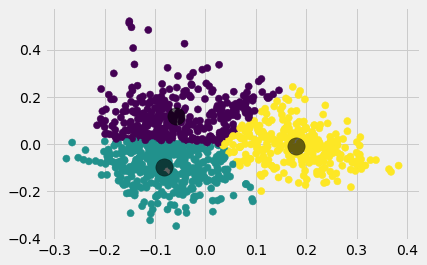

In [8]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

## Optimal Number of Clusters

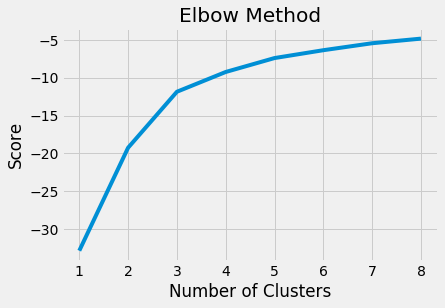

In [9]:
number_clusters = range(1, 9)

kmeans = [KMeans(n_clusters=i, max_iter = 100) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

## Examining the Top words in each Cluster

In [10]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 15)

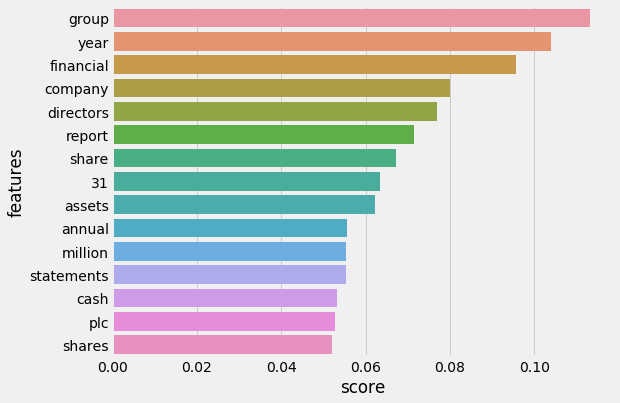

In [11]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])

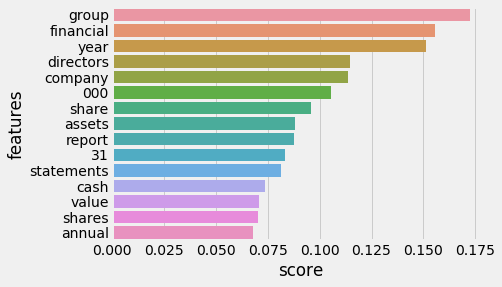

In [12]:
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[1][:15])

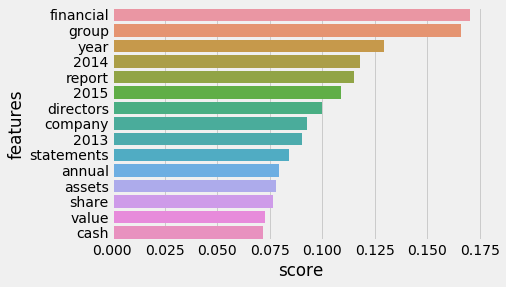

In [15]:
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[2][:15])

In [16]:
for i, df in enumerate(dfs):
    df.to_csv('df_'+str(i)+'.csv')

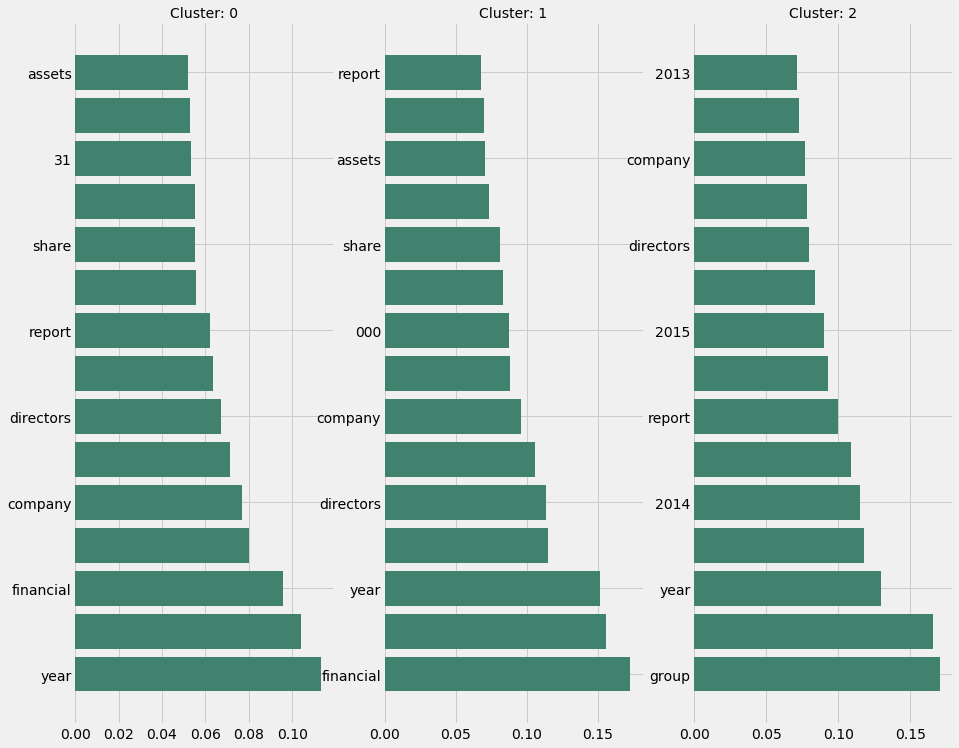

In [17]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,12))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)